In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

2024-07-31 13:46:10.900596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 13:46:10.931807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 13:46:10.941435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 13:46:10.963801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 13:46:13.273691: W tensorflow/compiler/tf2

In [13]:
DATASET = "fashion_mnist"
FASHION_MNIST_NUM_CLASSES = 10
FASHION_MNIST_SHAPE = (28, 28, 1)

In [5]:
train_ds, val_ds = tfds.load(DATASET, split=['train[:80%]', 'train[80%:]'])
test_ds = tfds.load(DATASET, split='test')
len(train_ds), len(val_ds), len(test_ds)

(48000, 12000, 10000)

2024-07-31 13:48:06.178590: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(<matplotlib.image.AxesImage at 0x146181860e80>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

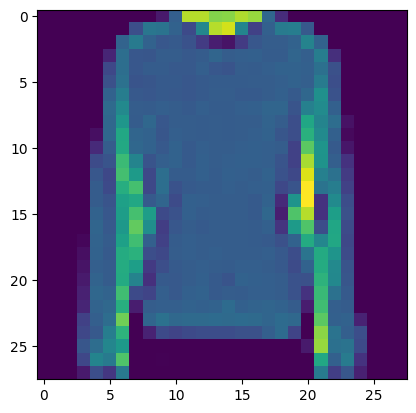

In [6]:
ex = next(iter(train_ds))
plt.imshow(ex['image']), ex['label']

In [7]:
ex['image'].numpy().max()  # pixels should be scaled down between 0 and 1

255

In [9]:
def preprocess_ds(ds, is_train=False):
    def element_fn(element):
        image = element['image']
        label = element['label']
        # image = tf.cast(image, dtype=tf.float32) / 255.  # rescale image
        return (image, label)
    
    if is_train:
        return (
            ds
            .map(element_fn)
            .shuffle(128)
            .batch(128)  # just increasing the batch size improved the training process a lot idk why
        )
    else:
        return (
            ds
            .map(element_fn)
            .batch(256)
        )

In [10]:
train = preprocess_ds(train_ds, is_train=True)
val = preprocess_ds(val_ds)
test = preprocess_ds(test_ds)

In [11]:
from models import get_lucasnet, get_simple_cnn, get_mobilenet, get_efficientnet

In [12]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(f'Accuracy on {DATASET}')
    plt.show()

In [15]:
model = get_simple_cnn(FASHION_MNIST_SHAPE, FASHION_MNIST_NUM_CLASSES)

Epoch 1/100


I0000 00:00:1722426623.491301 1440575 service.cc:146] XLA service 0x1460ec0080c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722426623.491355 1440575 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-07-31 13:50:23.557451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-31 13:50:23.862619: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-07-31 13:50:26.913037: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

 16/375 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1532 - loss: 2.2834

I0000 00:00:1722426627.856165 1440575 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4912 - loss: 1.3877 - val_accuracy: 0.7697 - val_loss: 0.6088
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7552 - loss: 0.6576 - val_accuracy: 0.8048 - val_loss: 0.5284
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7886 - loss: 0.5762 - val_accuracy: 0.8206 - val_loss: 0.4819
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.5292 - val_accuracy: 0.8383 - val_loss: 0.4377
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.4981 - val_accuracy: 0.8388 - val_loss: 0.4319
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 0.4731 - val_accuracy: 0.8514 - val_loss: 0.4029
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8355 - loss: 0.4517 - val_accuracy: 0.8575 - val_loss: 0.3820
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.4332 - val_accuracy: 0.8

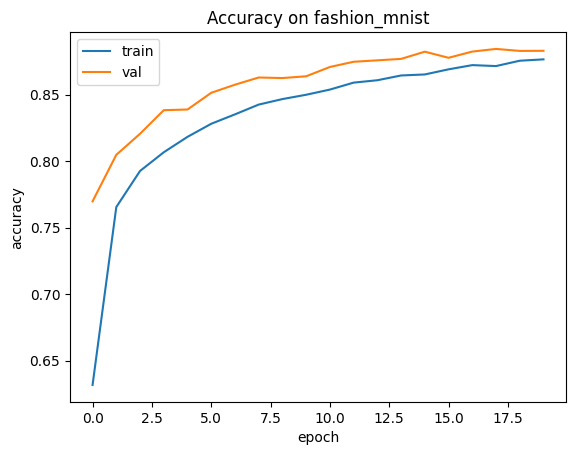

In [16]:
history = model.fit(
    train, 
    epochs=100, 
    validation_data=val,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
)
print(model.evaluate(test))
plot_history(history)

In [17]:
model = get_lucasnet(FASHION_MNIST_SHAPE, FASHION_MNIST_NUM_CLASSES)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7470 - loss: 0.7149 - val_accuracy: 0.8790 - val_loss: 0.3335
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8689 - loss: 0.3582 - val_accuracy: 0.8953 - val_loss: 0.2873
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8881 - loss: 0.3076 - val_accuracy: 0.9072 - val_loss: 0.2609
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8992 - loss: 0.2771 - val_accuracy: 0.9093 - val_loss: 0.2525
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9080 - loss: 0.2528 - val_accuracy: 0.9111 - val_loss: 0.2467
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9096 - loss: 0.2419 - val_accuracy: 0.9163 - val_loss: 0.2314
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9182 - loss: 0.2217 - val_accuracy: 0.9158 - val_loss: 0.2342
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9257 - loss: 0.2048 - val_a

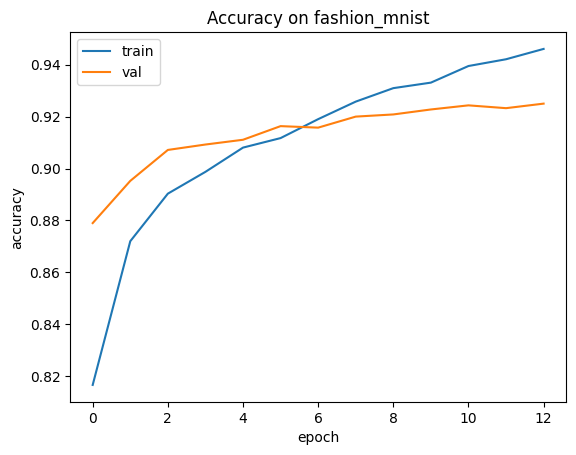

In [18]:
history = model.fit(
    train, 
    epochs=100, 
    validation_data=val,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
)
print(model.evaluate(test))
plot_history(history)